In [1]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import os


# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 建立簡單的線性執行的模型
model = keras.models.Sequential()

model.add(Conv2D(filters=12, kernel_size=(3, 3),
                 activation='relu', padding='same',
                 input_shape=(28, 28, 1))) # 高 寬 RGB
model.add(MaxPooling2D(pool_size=(2, 2)))  # kernel_size=(2, 2)
model.add(Flatten())                       # fully-connected layer

# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=400,  activation='relu')) 
model.add(Dense(units=200, activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1

y_TestOneHot = np_utils.to_categorical(y_test) 

# 將 training 的 label 進行 one-hot encoding，例如數字 7 經過 One-hot encoding 轉換後是 0000001000，即第7個值為 1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 


# 將 training 的 input 資料轉為2維
X_train_2D = X_train.reshape(60000, 28, 28, 1).astype('float32')  
X_test_2D = X_test.reshape(10000, 28, 28, 1).astype('float32')  

x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

print(model.summary())

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 12)        120       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               941200    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 1,023,530
Trainable params: 1,023,530
Non-trainable params: 0
____________________________________________

In [2]:
x_Train_norm.min(), x_Train_norm.max()

(0.0, 1.0)

In [3]:
# 進行訓練, 訓練過程會存在 train_history 變數中
# calllback
train_history = model.fit(x=x_Train_norm, 
                          y=y_TrainOneHot, 
                          validation_split=0.2, 
                          epochs=50, 
                          batch_size=200, 
                          verbose=2)  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
 - 4s - loss: 0.3156 - accuracy: 0.9097 - val_loss: 0.1237 - val_accuracy: 0.9647
Epoch 2/50
 - 1s - loss: 0.0915 - accuracy: 0.9730 - val_loss: 0.0890 - val_accuracy: 0.9718
Epoch 3/50
 - 1s - loss: 0.0552 - accuracy: 0.9835 - val_loss: 0.0650 - val_accuracy: 0.9799
Epoch 4/50
 - 1s - loss: 0.0386 - accuracy: 0.9877 - val_loss: 0.0595 - val_accuracy: 0.9827
Epoch 5/50
 - 1s - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0548 - val_accuracy: 0.9835
Epoch 6/50
 - 1s - loss: 0.0215 - accuracy: 0.9936 - val_loss: 0.0579 - val_accuracy: 0.9831
Epoch 7/50
 - 1s - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.0661 - val_accuracy: 0.9820
Epoch 8/50
 - 1s - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0778 - val_accuracy: 0.9782
Epoch 9/50
 - 1s - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.0584 - val_accuracy: 0.9839
Epoch 10/50
 - 1s - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.0685 - val_accuracy: 0.9829
Epoch 11/50
 - 1s -

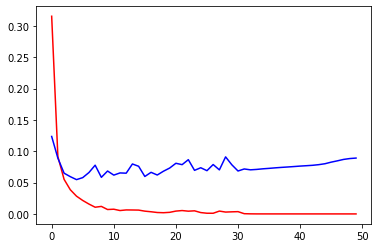

In [4]:
%matplotlib inline
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.show()

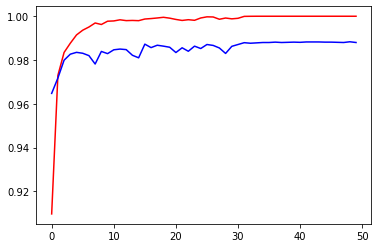

In [5]:
%matplotlib inline
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.show()

In [6]:
# 顯示訓練成果(分數) 98.7%
scores = model.evaluate(x_Train_norm, y_TrainOneHot)  
print()  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0))  


60000/60000 [==============================] - 3s 50us/step

	[Info] Accuracy of training data = 99.8%


In [ ]:
x_Test_norm.shape


In [7]:
# 顯示訓練成果(分數) 96.2%
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  


10000/10000 [==============================] - 1s 56us/step

	[Info] Accuracy of testing data = 98.9%


In [ ]:
# how to read sample image and detect 
!dir *.jpg

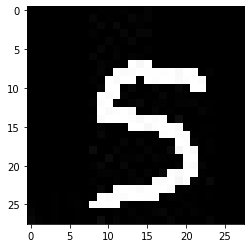

In [8]:
import matplotlib.pyplot as plt
from skimage import color
test = color.rgb2gray(plt.imread('5.jpg')) 
plt.imshow(test, cmap='gray')
plt.show()


In [ ]:
test.shape

In [ ]:
# ValueError: Error when checking input: expected dense_1_input to have shape (784,) but got array with shape (1,)

In [9]:
# 考你
import numpy as np
model.predict_proba(test.reshape(1, 784)), \
np.argmax(model.predict_proba(test.reshape(1, 784)))

# ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (1, 784)

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (1, 784)